### Loading the dataset

In [1]:
print('Importing required for data analysis')

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

Importing required for data analysis


In [6]:
pokemon = pd.read_csv('dataset/pokemon_1.csv',index_col="#")

In [7]:
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [12]:
### Sorting Alphabetically and Numerically with ascending, Descding respectively

(pokemon.
 sort_values(['Type 1','HP'],ascending=[True,False])
 .head(5)
)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total
#,,,,,,,,,,,,
521,Yanmega,Bug,Flying,86,76,86,116,56,95,4,False,515
699,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False,550
232,Heracross,Bug,Fighting,80,125,75,40,95,85,2,False,500
233,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,600
679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,False,495


### New Way to assign / Introduce new column in dataframe  this is pakage way/method to do that

In [9]:
pokemon=(pokemon
 .assign(
     total = pokemon.iloc[:,3:9].sum(axis=1)
 )
)

In [10]:
pokemon

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600


#### Making the Dataframe that newly assigned column is in last column in here to make out that column into 3 index column of dataframe

In [29]:
cols = list(pokemon.columns.values)

print([cols[-1]]+cols[3:-1])

['total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [31]:
pokemon=(pokemon
 [cols[0:3]+[cols[-1]]+cols[3:-1]]
)

In [33]:
## Assigning New column in position of 3 index of columns
pokemon.head()

,Name,Type 1,Type 2,total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### There is another way to assign new column in dataframe with pandas package method 

In [41]:
avg = round(pokemon.iloc[:,4:-2].sum(axis=1)/pokemon.iloc[:,4:-2].shape[1],2)

In [44]:
pokemon.insert(loc=4,column='Average_overall',value=avg)

In [45]:
pokemon.head()

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,53.00,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,67.50,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,87.50,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,625,104.17,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,309,51.50,39,52,43,60,50,65,1,False


In [46]:
### Saving Our Data (Exporting into Desired Format)

pokemon.to_csv("dataset/Modified_pokemon.csv",index=False)

In [47]:
### If we want our dataset save in text format

pokemon.to_csv("dataset/Modified_pokemon.txt",index=False,sep='\t')

In [52]:
#### Just check that written data gives same result or not

In [50]:
dum = pd.read_csv('dataset/Modified_pokemon.txt',delimiter='\t')

In [51]:
dum

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,53.00,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,67.50,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,87.50,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,104.17,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,51.50,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,100.00,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,700,116.67,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,600,100.00,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,680,113.33,80,160,60,170,130,80,6,True


#### Filtering text data

- In Pokemon data, Name column there is some pokemon with Mega Evolution attribute so filter that pokemon for analysis purpose

In [80]:
pokemon.reset_index(drop=True,inplace=True)

In [87]:
pokemon.dropna(subset='Name',inplace=True)

C:\Users\Sivaselvan\AppData\Local\Temp\ipykernel_22396\2133632338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon.dropna(subset='Name',inplace=True)


In [89]:
(pokemon
 .loc
 [pokemon['Name']
  .str
  .contains("Mega")
  ].head(10))

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,Mega Venusaur,Grass,Poison,625,104.17,80,100,123,122,120,80,1,False
7,Mega Charizard X,Fire,Dragon,634,105.67,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Fire,Flying,634,105.67,78,104,78,159,115,100,1,False
12,Mega Blastoise,Water,NaN,630,105.00,79,103,120,135,115,78,1,False
19,Mega Beedrill,Bug,Poison,495,82.50,65,150,40,15,80,145,1,False
23,Mega Pidgeot,Normal,Flying,579,96.50,83,80,80,135,80,121,1,False
71,Mega Alakazam,Psychic,NaN,590,98.33,55,50,65,175,95,150,1,False
87,Mega Slowbro,Water,Psychic,590,98.33,95,75,180,130,80,30,1,False
102,Mega Gengar,Ghost,Poison,600,100.00,60,65,80,170,95,130,1,False
124,Mega Kangaskhan,Normal,NaN,590,98.33,105,125,100,60,100,100,1,False


#### In Text filtering we use regex module to advance filter options

In [95]:
import re
(
pokemon
.loc
[pokemon['Type 1'].str.contains("Fire|Grass",flags=re.I,regex=True)]
.head()
)

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,53.00,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,67.50,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,87.50,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,104.17,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,51.50,39,52,43,60,50,65,1,False


In [102]:
###  Filerting text data 


(pokemon
 .loc
 [pokemon['Name'].str.contains("^pi[a-z]*",flags=re.I,regex=True)])

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20,Pidgey,Normal,Flying,251,41.83,40,45,40,35,35,56,1,False
21,Pidgeotto,Normal,Flying,349,58.17,63,60,55,50,50,71,1,False
22,Pidgeot,Normal,Flying,479,79.83,83,80,75,70,70,101,1,False
30,Pikachu,Electric,NaN,320,53.33,35,55,40,50,50,90,1,False
136,Pinsir,Bug,NaN,500,83.33,65,125,100,55,70,85,1,False
186,Pichu,Electric,NaN,205,34.17,20,40,15,35,35,60,2,False
219,Pineco,Bug,NaN,290,48.33,50,65,90,35,35,15,2,False
239,Piloswine,Ice,Ground,450,75.00,100,100,80,60,60,50,2,False
438,Piplup,Water,NaN,314,52.33,53,51,53,61,56,40,4,False
558,Pignite,Fire,Fighting,418,69.67,90,93,55,70,55,55,5,False


#### Conditional Changes

In [110]:
pokemon.loc[pokemon['Type 1'] == 'Fire',"Type 1"] = 'Flamie'

pokemon[pokemon['Type 1'] == 'Flamie'].head()

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,Charmander,Flamie,NaN,309,51.50,39,52,43,60,50,65,1,False
5,Charmeleon,Flamie,NaN,405,67.50,58,64,58,80,65,80,1,False
6,Charizard,Flamie,Flying,534,89.00,78,84,78,109,85,100,1,False
7,Mega Charizard X,Flamie,Dragon,634,105.67,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Flamie,Flying,634,105.67,78,104,78,159,115,100,1,False


In [111]:
pokemon.loc[pokemon['Type 1'] == 'Flamie','Type 1'] = 'Fire'

pokemon[pokemon['Type 1'] == 'Fire'].head()

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,309,51.50,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,67.50,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,89.00,78,84,78,109,85,100,1,False
7,Mega Charizard X,Fire,Dragon,634,105.67,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Fire,Flying,634,105.67,78,104,78,159,115,100,1,False


In [106]:
pokemon

,Name,Type 1,Type 2,total,Average_overall,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,53.00,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,67.50,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,87.50,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,104.17,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,51.50,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,100.00,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,700,116.67,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,600,100.00,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,680,113.33,80,160,60,170,130,80,6,True


In [114]:
pokemon.dtypes

Name                object
Type 1              object
Type 2              object
total                int64
Average_overall    float64
HP                   int64
Attack               int64
Defense              int64
Sp. Atk              int64
Sp. Def              int64
Speed                int64
Generation           int64
Legendary             bool
dtype: object

<Axes: title={'center': 'Understand Which Type of pokemon has Higest Overall'}, ylabel='Type 1'>

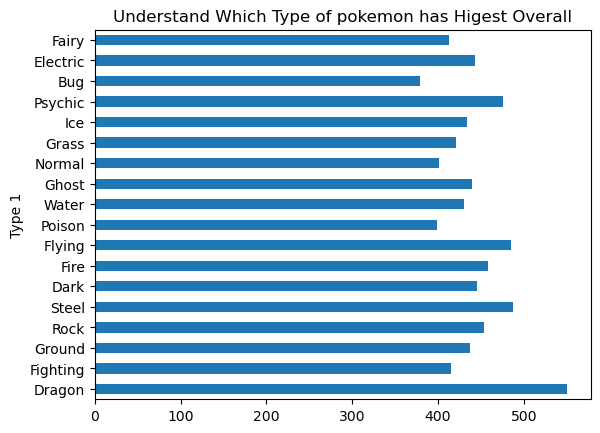

In [136]:
(pokemon
 .groupby(['Type 1'])
[[i for i in pokemon.select_dtypes(np.number)]]
.mean()
.sort_values(['Attack','Sp. Atk'],ascending=[0,0])['total']
.plot(kind='barh',title='Understand Which Type of pokemon has Higest Overall')
)

In [118]:
[i  for i in pokemon.select_dtypes(np.number)]

['total',
 'Average_overall',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation']